## NAME - TANU GOYAL

## **PROBLEM STATEMENT**
Analyze sales data to identify trends, top-selling products, and revenue metrics for business decision-making.

# Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data

In [ ]:
data=pd.read_csv("/content/Sales Data.csv")
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# Exploration and Cleaning of Data

In [ ]:
data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [ ]:
data.dtypes

In [ ]:
data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [ ]:
# dropping unnecessary columns
df=data.drop(columns=['Unnamed: 0','Order ID','Purchase Address'])
df

,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour
0,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,12,1700.00,New York City,0
1,LG Washing Machine,1,600.00,2019-12-29 07:03:00,12,600.00,New York City,7
2,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,12,11.95,New York City,18
3,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,12,149.99,San Francisco,15
4,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...
185945,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,6,2.99,Boston,19
185946,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,6,149.99,New York City,19
185947,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,6,11.95,San Francisco,18
185948,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,6,11.95,San Francisco,18


# Analysing the Total sales date-wise

In [ ]:
date=df['Order Date'].dt.date.unique().tolist()
total_price_date=[]
for i in date:
  s1=df.loc[df['Order Date'].dt.date == i, 'Sales'].sum()
  total_price_date.append(s1)
sales_date_wise=pd.DataFrame(date)
sales_date_wise['total_price_date']=total_price_date
sales_date_wise=sales_date_wise.rename(columns={0:'date'})

# metric for total sale date-wise

In [ ]:
sales_date_wise

,date,total_price_date
0,2019-12-30,152319.81
1,2019-12-29,156024.62
2,2019-12-12,144195.15
3,2019-12-22,147348.09
4,2019-12-18,154598.77
...,...,...
361,2019-06-17,81022.16
362,2019-06-03,85261.91
363,2019-06-04,86559.43
364,2019-06-18,98105.83


In [ ]:
sales_date_wise=sales_date_wise.sort_values(by=['date'])
sales_date_wise

,date,total_price_date
253,2019-01-01,65681.94
267,2019-01-02,70813.20
257,2019-01-03,47046.20
274,2019-01-04,62012.21
249,2019-01-05,46524.63
...,...,...
9,2019-12-28,134015.50
1,2019-12-29,156024.62
0,2019-12-30,152319.81
5,2019-12-31,131454.30


#Trend of sales date-wise

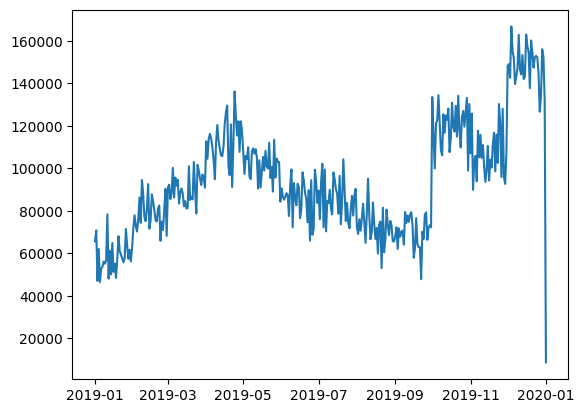

In [ ]:
plt.plot(sales_date_wise['date'],sales_date_wise['total_price_date'])
plt.title('Trend of sale Date-wise')
plt.xlabel('date')
plt.ylabel('Total sale')

# Analysing Total sales monthly

In [ ]:
month=df.Month.unique().tolist()
total_price_monthly=[]
for i in month:
  s1=df.loc[df['Month'] == i, 'Sales'].sum()
  total_price_monthly.append(s1)
monthly_sales=pd.DataFrame(month)
monthly_sales['total_price_monthly']=total_price_monthly
monthly_sales=monthly_sales.rename(columns={0:'month'})



# metric for total sales monthly

In [ ]:
monthly_sales=monthly_sales.sort_values(by=['month'])
monthly_sales

,month,total_price_monthly
1,1,1822256.73
4,2,2202022.42
5,3,2807100.38
2,4,3390670.24
3,5,3152606.75
8,6,2577802.26
11,7,2647775.76
6,8,2244467.88
7,9,2097560.13
10,10,3736726.88


<BarContainer object of 12 artists>

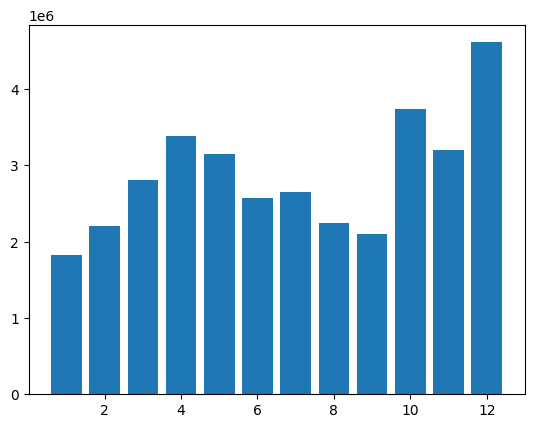

In [ ]:
import matplotlib.pyplot as plt
plt.bar(monthly_sales['month'],monthly_sales['total_price_monthly'])
plt.title('monthly total sales')
plt.xlabel('months')
plt.ylabel('total sales')

# Trend of total sale monthly

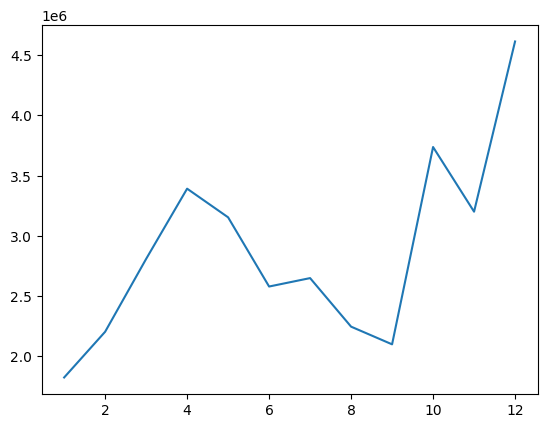

In [ ]:
import matplotlib.pyplot as plt
plt.plot(monthly_sales['month'],monthly_sales['total_price_monthly'])
plt.title('trend of monthly total sales')
plt.xlabel('months')
plt.ylabel('total sales')

we see that first the sales increases and then decreases but again increases

# Analysis of Growth Rate

In [ ]:
monthly_sales['MoM Growth Rate'] = ((monthly_sales['total_price_monthly'] - monthly_sales['total_price_monthly'].shift(1)) / monthly_sales['total_price_monthly'].shift(1)) * 100

In [ ]:
monthly_sales

NameError: ignored

In [ ]:
plt.bar(monthly_sales['month'],monthly_sales['MoM Growth Rate'])
plt.title(' Growth Rate of sales')
plt.xlabel('months')
plt.ylabel('Growth rate')

# Analysis of best selling product

In [ ]:
product_list=df.Product.unique().tolist()
total_price_product_wise=[]
for i in product_list:
  s2=df.loc[df['Product'] == i, 'Sales'].sum()
  total_price_product_wise.append(s2)
product_sales=pd.DataFrame(product_list)
product_sales['total_price_product_wise']=total_price_product_wise
product_sales=product_sales.rename(columns={0:'product'})


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Macbook Pro Laptop'),
  Text(1, 0, 'LG Washing Machine'),
  Text(2, 0, 'USB-C Charging Cable'),
  Text(3, 0, '27in FHD Monitor'),
  Text(4, 0, 'AA Batteries (4-pack)'),
  Text(5, 0, 'Bose SoundSport Headphones'),
  Text(6, 0, 'AAA Batteries (4-pack)'),
  Text(7, 0, 'ThinkPad Laptop'),
  Text(8, 0, 'Lightning Charging Cable'),
  Text(9, 0, 'Google Phone'),
  Text(10, 0, 'Wired Headphones'),
  Text(11, 0, 'Apple Airpods Headphones'),
  Text(12, 0, 'Vareebadd Phone'),
  Text(13, 0, 'iPhone'),
  Text(14, 0, '20in Monitor'),
  Text(15, 0, '34in Ultrawide Monitor'),
  Text(16, 0, 'Flatscreen TV'),
  Text(17, 0, '27in 4K Gaming Monitor'),
  Text(18, 0, 'LG Dryer')])

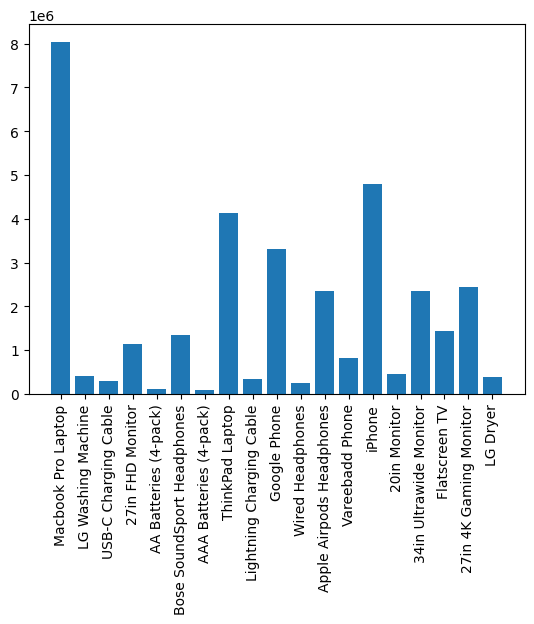

In [ ]:
import matplotlib.pyplot as plt
plt.bar(product_sales['product'],product_sales['total_price_product_wise'])
plt.xticks(rotation=90)
plt.ylabel('total_sales of product')

from bargraph we can see that macbook pro laptop has the heighest sales

In [ ]:
product_list=df.Product.unique().tolist()
total_unit_product_wise=[]
for i in product_list:
  s2=df.loc[df['Product'] == i, 'Quantity Ordered'].sum()
  total_unit_product_wise.append(s2)
product_quantity=pd.DataFrame(product_list)
product_quantity['total_unit_product_wise']=total_unit_product_wise
product_quantity=product_quantity.rename(columns={0:'product'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Macbook Pro Laptop'),
  Text(1, 0, 'LG Washing Machine'),
  Text(2, 0, 'USB-C Charging Cable'),
  Text(3, 0, '27in FHD Monitor'),
  Text(4, 0, 'AA Batteries (4-pack)'),
  Text(5, 0, 'Bose SoundSport Headphones'),
  Text(6, 0, 'AAA Batteries (4-pack)'),
  Text(7, 0, 'ThinkPad Laptop'),
  Text(8, 0, 'Lightning Charging Cable'),
  Text(9, 0, 'Google Phone'),
  Text(10, 0, 'Wired Headphones'),
  Text(11, 0, 'Apple Airpods Headphones'),
  Text(12, 0, 'Vareebadd Phone'),
  Text(13, 0, 'iPhone'),
  Text(14, 0, '20in Monitor'),
  Text(15, 0, '34in Ultrawide Monitor'),
  Text(16, 0, 'Flatscreen TV'),
  Text(17, 0, '27in 4K Gaming Monitor'),
  Text(18, 0, 'LG Dryer')])

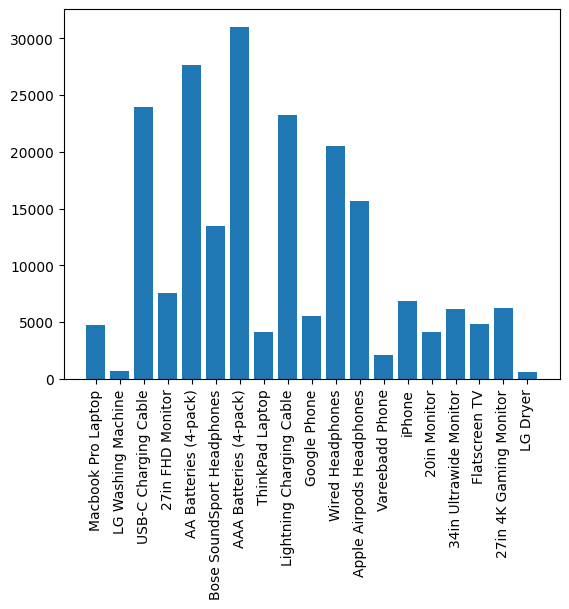

In [ ]:
import matplotlib.pyplot as plt
plt.bar(product_quantity['product'],product_quantity['total_unit_product_wise'])
plt.xticks(rotation=90)
plt.ylabel('quantity of product')

we can see that from graph AAA Btteries is most selling product

# Analysis of total sales date-wise and for each city

In [ ]:
city=df['City'].unique().tolist()
date=df['Order Date'].dt.date.unique().tolist()
city_sales=pd.DataFrame(date)
for j in city:
  total_price_date=[]
  for i in date:
    s1=df.loc[(df['Order Date'].dt.date == i) & (df['City'] == j), 'Sales'].sum()
    total_price_date.append(s1)
  city_sales[j]=total_price_date
  city_sales=city_sales.rename(columns={0:'date'})




In [ ]:
city_sales=city_sales.sort_values(by=['date'])
city_sales

,date,New York City,San Francisco,Atlanta,Portland,Dallas,Los Angeles,Boston,Austin,Seattle
253,2019-01-01,5849.63,14160.78,5073.02,2971.32,5887.39,13255.58,9398.93,1645.32,7439.97
267,2019-01-02,8961.80,19760.67,6090.95,4359.78,7807.01,10016.08,6359.15,2424.62,5033.14
257,2019-01-03,4012.95,11714.46,2281.95,1910.03,3152.81,10105.24,6062.08,3120.38,4686.30
274,2019-01-04,6830.51,17256.76,6747.21,2574.89,7331.46,11958.43,5951.04,1163.73,2198.18
249,2019-01-05,4320.47,10990.10,3143.15,2726.93,2960.99,8087.97,10407.27,590.62,3297.13
...,...,...,...,...,...,...,...,...,...,...
9,2019-12-28,14436.17,37837.68,5613.75,8770.02,11612.18,19339.45,14451.85,8165.42,13788.98
1,2019-12-29,24414.17,36956.36,12976.66,7597.84,12658.86,21866.41,16853.54,7763.91,14936.87
0,2019-12-30,19869.59,38449.91,12700.45,9306.21,15347.72,21045.66,17855.01,7310.50,10434.76
5,2019-12-31,14238.66,34238.90,9300.81,6831.48,12039.83,22389.75,15901.58,3572.94,12940.35


Text(0.5, 1.0, 'date wise sale of seattle')

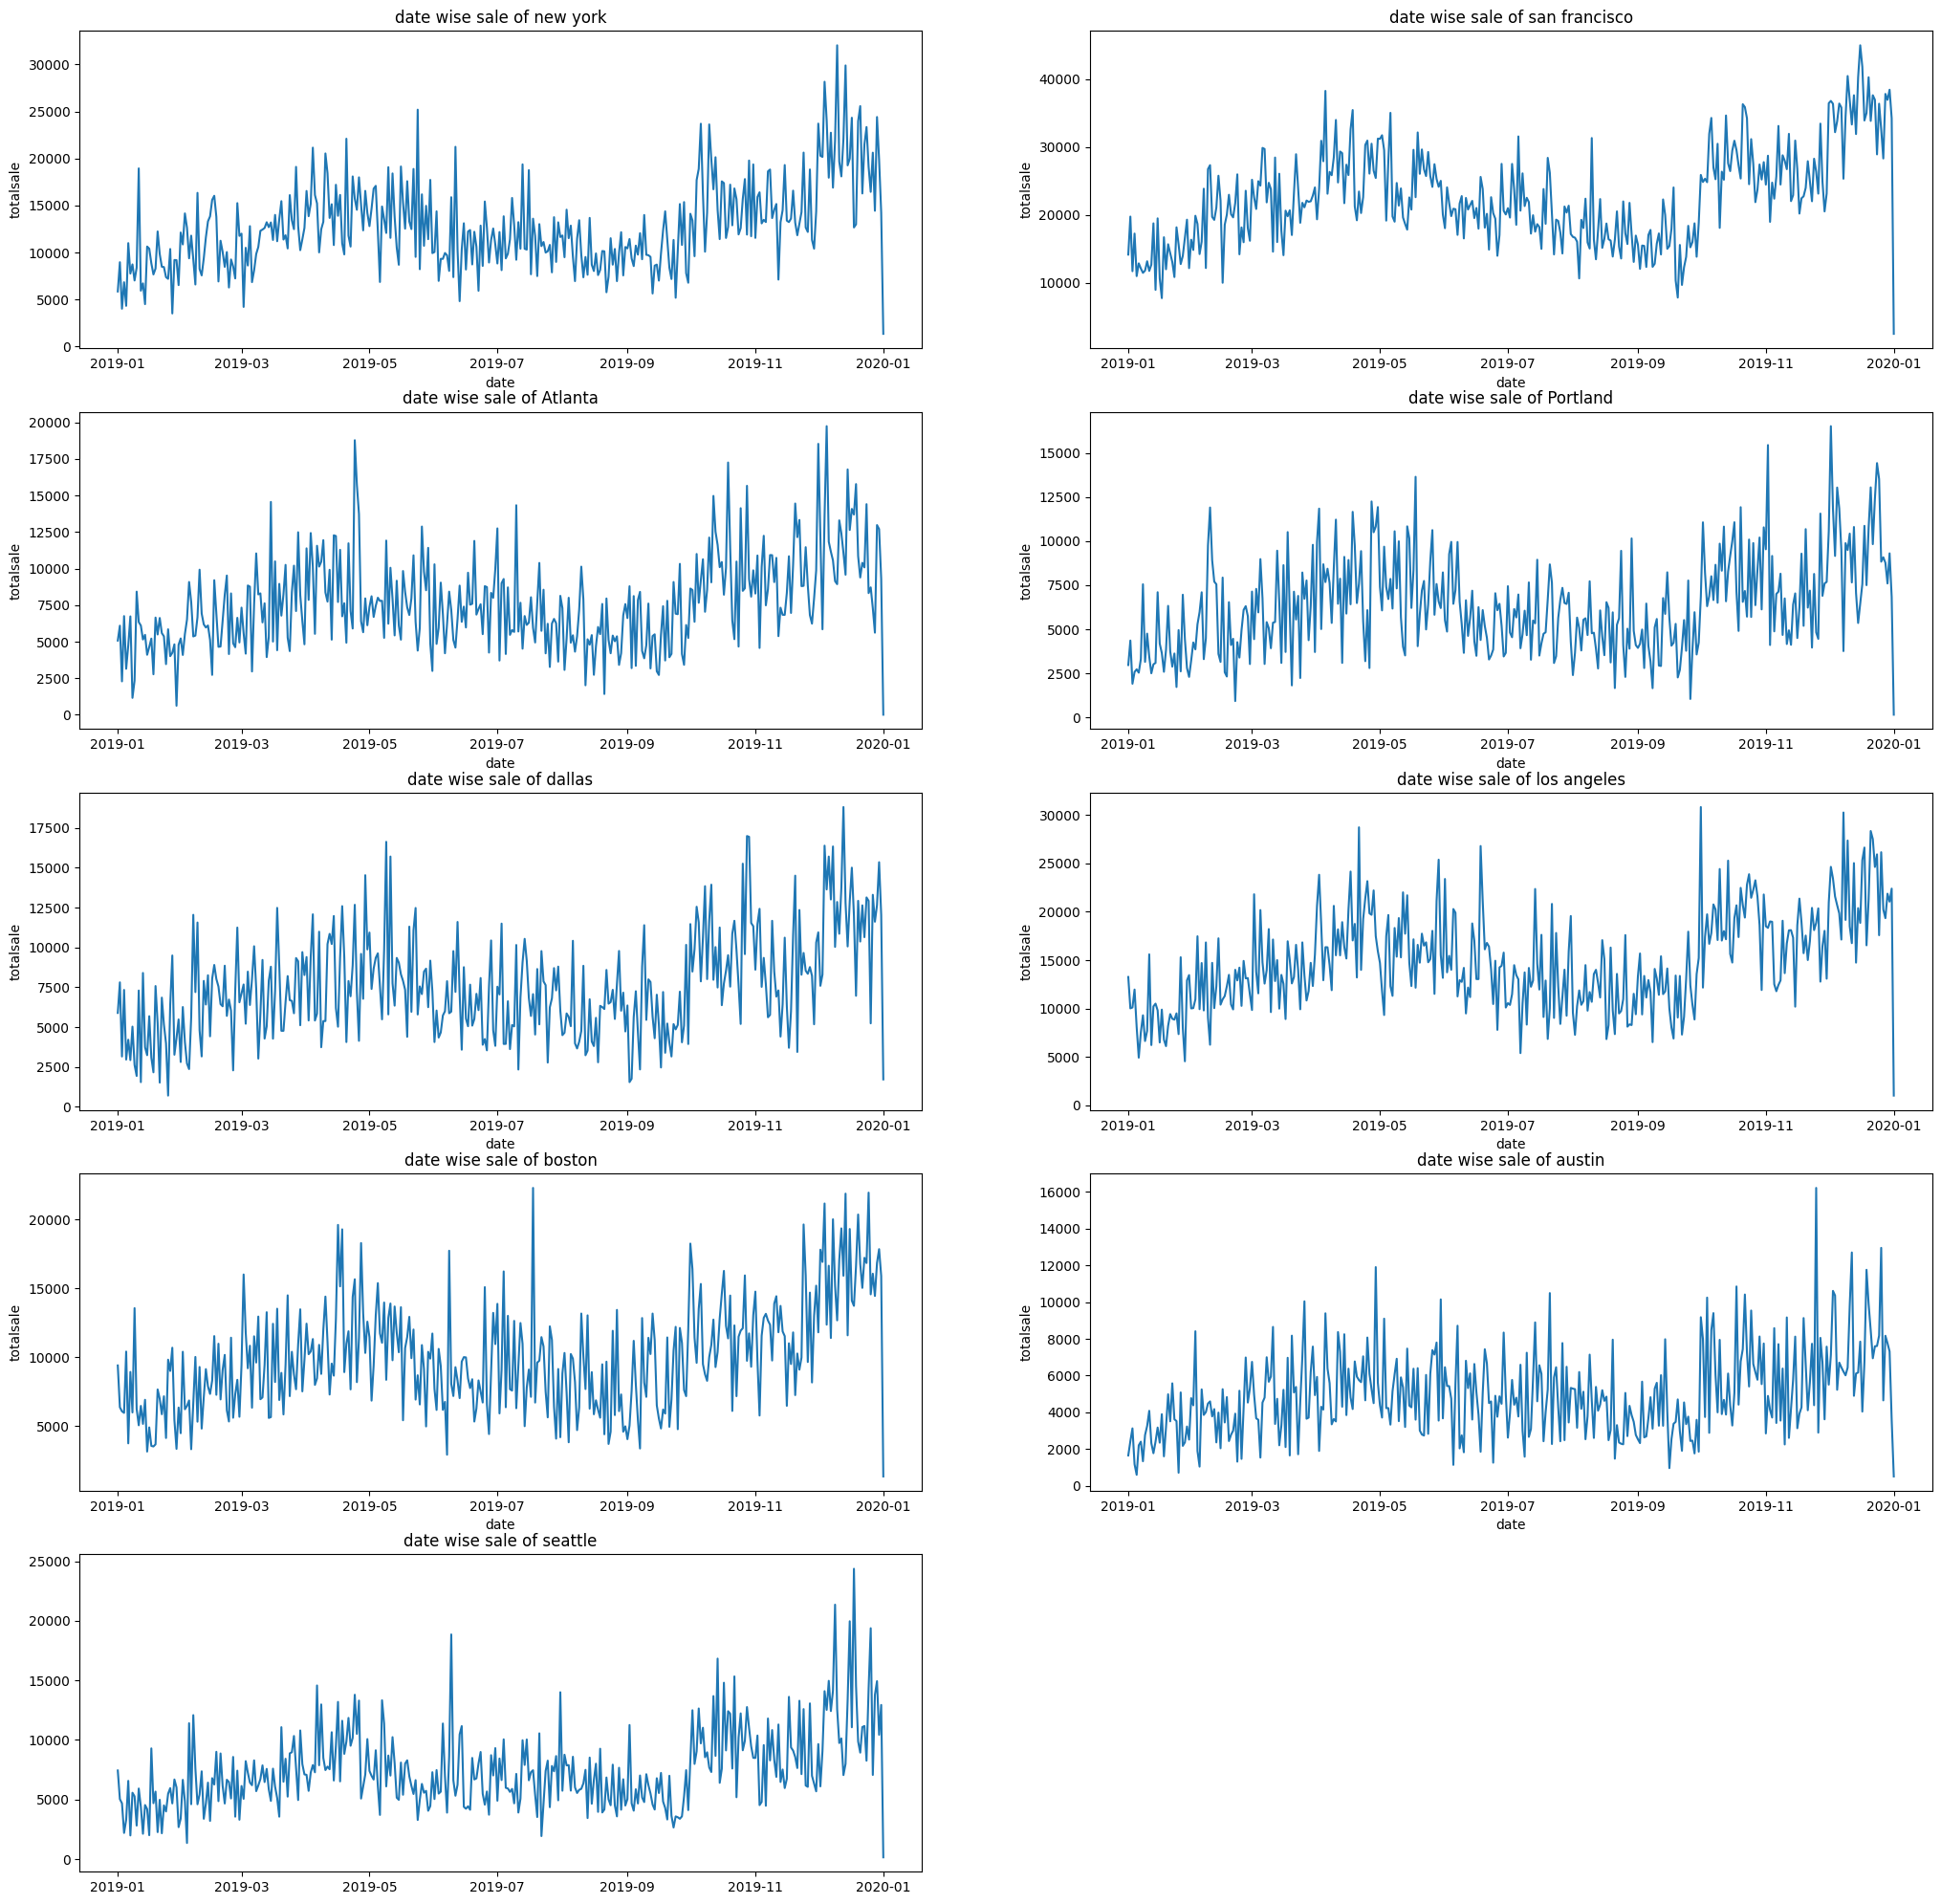

In [ ]:
boxsize = 25
f       = plt.figure(figsize=(boxsize, boxsize))
pt1=plt.subplot(521)
plt.plot(city_sales['date'],city_sales[' New York City'])
plt.title("date wise sale of new york")
plt.xlabel('date')
plt.ylabel('totalsale')
pt2=plt.subplot(522)
plt.plot(city_sales['date'],city_sales[' San Francisco'])
plt.title("date wise sale of san francisco")
plt.xlabel('date')
plt.ylabel('totalsale')
pt3=plt.subplot(523)
plt.plot(city_sales['date'],city_sales[' Atlanta'])
plt.title("date wise sale of Atlanta")
plt.xlabel('date')
plt.ylabel('totalsale')
pt4=plt.subplot(524)
plt.plot(city_sales['date'],city_sales[' Portland'])
plt.title("date wise sale of Portland")
plt.xlabel('date')
plt.ylabel('totalsale')
pt5=plt.subplot(525)
plt.plot(city_sales['date'],city_sales[' Dallas'])
plt.title("date wise sale of dallas")
plt.xlabel('date')
plt.ylabel('totalsale')
pt6=plt.subplot(526)
plt.plot(city_sales['date'],city_sales[' Los Angeles'])
plt.title("date wise sale of los angeles")
plt.xlabel('date')
plt.ylabel('totalsale')
pt7=plt.subplot(527)
plt.plot(city_sales['date'],city_sales[' Boston'])
plt.title("date wise sale of boston")
plt.xlabel('date')
plt.ylabel('totalsale')
pt8=plt.subplot(528)
plt.plot(city_sales['date'],city_sales[' Austin'])
plt.title("date wise sale of austin")
plt.xlabel('date')
plt.ylabel('totalsale')
pt9=plt.subplot(529)
plt.plot(city_sales['date'],city_sales[' Seattle'])
plt.title("date wise sale of seattle")




In [ ]:
''